In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

Reading dataset

In [2]:
df_original = pd.read_csv("Downloads/bikes.csv", sep = ";")

In [3]:
df_original.head(n=15)

,Unnamed: 0,date,bikes
0,1,02.01.2019,123
1,2,03.01.2019,195
2,3,04.01.2019,202
3,4,05.01.2019,75
4,5,07.01.2019,178
5,6,08.01.2019,129
6,7,09.01.2019,137
7,8,10.01.2019,98
8,9,11.01.2019,134
9,10,12.01.2019,194


In [4]:
df_original.describe()

,Unnamed: 0,bikes
count,350.000000,350.000000
mean,175.500000,184.094286
std,101.180532,84.708566
min,1.000000,22.000000
25%,88.250000,123.000000
50%,175.500000,170.000000
75%,262.750000,227.500000
max,350.000000,571.000000


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  350 non-null    int64 
 1   date        350 non-null    object
 2   bikes       350 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


#### One-year dataset has 350 days (15 days missing - Sundays or holidays)

In [6]:
len(df_original["date"].unique()) #no data duplicates

350

In [7]:
df_original.isna().sum() #no missing data

Unnamed: 0    0
date          0
bikes         0
dtype: int64

Creating a copy of dataset to data manipulation purposes

In [8]:
df = df_original
df.head()

,Unnamed: 0,date,bikes
0,1,02.01.2019,123
1,2,03.01.2019,195
2,3,04.01.2019,202
3,4,05.01.2019,75
4,5,07.01.2019,178


In [9]:
#changing type from object to date 

def to_dt(x):
    x = x.split(".") #current data separator
    return datetime.date(int(x[2]),int(x[1]),int(x[0])) #year month day

df["datedt"] = df['date'].apply(to_dt)
#df['datedt'] = pd.to_datetime(df['date']) #quite an unintuitive format yyyy-dd-mm

## Sorting by date

In [10]:
df = df.sort_values(by = ["datedt"], ignore_index=True) #overwriting with sorted values

#### Weekday column

In [11]:
def to_weekday(x):
    return x.strftime("%A") #works only for strings

df['weekdaydt'] = df['datedt'].apply(to_weekday)

df.head()

,Unnamed: 0,date,bikes,datedt,weekdaydt
0,1,02.01.2019,123,2019-01-02,Wednesday
1,2,03.01.2019,195,2019-01-03,Thursday
2,3,04.01.2019,202,2019-01-04,Friday
3,4,05.01.2019,75,2019-01-05,Saturday
4,5,07.01.2019,178,2019-01-07,Monday


In [12]:
df.head()

,Unnamed: 0,date,bikes,datedt,weekdaydt
0,1,02.01.2019,123,2019-01-02,Wednesday
1,2,03.01.2019,195,2019-01-03,Thursday
2,3,04.01.2019,202,2019-01-04,Friday
3,4,05.01.2019,75,2019-01-05,Saturday
4,5,07.01.2019,178,2019-01-07,Monday


#### Month column

In [13]:
def month(x):
    return x.strftime("%m") + " - " + x.strftime("%B")

df["month"] = df['datedt'].apply(month)

df.head()

,Unnamed: 0,date,bikes,datedt,weekdaydt,month
0,1,02.01.2019,123,2019-01-02,Wednesday,01 - January
1,2,03.01.2019,195,2019-01-03,Thursday,01 - January
2,3,04.01.2019,202,2019-01-04,Friday,01 - January
3,4,05.01.2019,75,2019-01-05,Saturday,01 - January
4,5,07.01.2019,178,2019-01-07,Monday,01 - January


In [14]:
print (min( df['datedt']) ) 
print (max( df['datedt']) ) #range 2019

2019-01-02
2019-12-31


#### Season column

In [15]:
def season(date):
    if date >= datetime.date(date.year,3,20) and date < datetime.date(date.year,6,20):
        return "Spring"
    if date >= datetime.date(date.year,6,20) and date < datetime.date(date.year,9,22):
        return "Summer"
    if date >= datetime.date(date.year,9,21) and date < datetime.date(date.year,12,23):
        return "Autumn"
    else:
        return "Winter"


#print(df["datedt"].iloc[3]) #personal checks
#print(season(df["datedt"].iloc[3]))

df["Season"] = df["datedt"].apply(season)

print(df.head())
#check for unique values
print(df["Season"].unique())

   Unnamed: 0        date  bikes      datedt  weekdaydt         month  Season
0           1  02.01.2019    123  2019-01-02  Wednesday  01 - January  Winter
1           2  03.01.2019    195  2019-01-03   Thursday  01 - January  Winter
2           3  04.01.2019    202  2019-01-04     Friday  01 - January  Winter
3           4  05.01.2019     75  2019-01-05   Saturday  01 - January  Winter
4           5  07.01.2019    178  2019-01-07     Monday  01 - January  Winter
['Winter' 'Spring' 'Summer' 'Autumn']


#### Quarter column

In [16]:
def to_quarter(x):
    return (int((x.month-1)/3) + 1)

df["quarter"] = df["datedt"].apply(to_quarter)

#### Sundays with shopping 

In [17]:
#Looked for any tabular form online to be read as url but no luck
Shopping_Sunday_2019 = ["2019-01-27", "2019-02-24", "2019-03-31", "2019-04-14", "2019-04-28", "2019-05-26", "2019-06-30", 
                        "2019-07-28", "2019-08-25", "2019-09-29", "2019-10-27", "2019-11-24", "2019-12-15", "2019-12-22", 
                        "2019-12-29"]

In [18]:
df_shopping_sunday = pd.DataFrame(Shopping_Sunday_2019, columns =['Sundays_dates']) 
df_shopping_sunday

,Sundays_dates
0,2019-01-27
1,2019-02-24
2,2019-03-31
3,2019-04-14
4,2019-04-28
5,2019-05-26
6,2019-06-30
7,2019-07-28
8,2019-08-25
9,2019-09-29


In [19]:
a = len(Shopping_Sunday_2019)

In [20]:
is_shop = [1]*a
is_shop

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [21]:
temp = pd.DataFrame(is_shop, columns =['Shopping_Sunday']) 
temp

,Shopping_Sunday
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [22]:
df_c = pd.concat([df_shopping_sunday.reset_index(drop=True), temp], axis=1)
#df_c = pd.DataFrame(df_c)

print(df_c.info)
print(df_c.columns)

<bound method DataFrame.info of    Sundays_dates  Shopping_Sunday
0     2019-01-27                1
1     2019-02-24                1
2     2019-03-31                1
3     2019-04-14                1
4     2019-04-28                1
5     2019-05-26                1
6     2019-06-30                1
7     2019-07-28                1
8     2019-08-25                1
9     2019-09-29                1
10    2019-10-27                1
11    2019-11-24                1
12    2019-12-15                1
13    2019-12-22                1
14    2019-12-29                1>
Index(['Sundays_dates', 'Shopping_Sunday'], dtype='object')


In [23]:
def to_dta(x):
    x = x.split("-") #current data separator
    return datetime.date(int(x[0]),int(x[1]),int(x[2])) #year month day

df_c['Sundays_dates2'] = df_c['Sundays_dates'].apply(to_dta)
#df_c['Sundays_dates2'] = pd.to_datetime(df_c['Sundays_dates']) #need to be commented to be later merged

In [24]:
df_Shop_Sund = pd.merge(df, df_c, how = "left", left_on = "datedt", right_on="Sundays_dates2")
df_Shop_Sund


,Unnamed: 0,date,bikes,datedt,weekdaydt,month,Season,quarter,Sundays_dates,Shopping_Sunday,Sundays_dates2
0,1,02.01.2019,123,2019-01-02,Wednesday,01 - January,Winter,1,NaN,NaN,NaN
1,2,03.01.2019,195,2019-01-03,Thursday,01 - January,Winter,1,NaN,NaN,NaN
2,3,04.01.2019,202,2019-01-04,Friday,01 - January,Winter,1,NaN,NaN,NaN
3,4,05.01.2019,75,2019-01-05,Saturday,01 - January,Winter,1,NaN,NaN,NaN
4,5,07.01.2019,178,2019-01-07,Monday,01 - January,Winter,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
345,346,27.12.2019,83,2019-12-27,Friday,12 - December,Winter,4,NaN,NaN,NaN
346,347,28.12.2019,217,2019-12-28,Saturday,12 - December,Winter,4,NaN,NaN,NaN
347,348,29.12.2019,82,2019-12-29,Sunday,12 - December,Winter,4,2019-12-29,1.0,2019-12-29
348,349,30.12.2019,200,2019-12-30,Monday,12 - December,Winter,4,NaN,NaN,NaN


In [25]:
df_Shop_Sund['Shopping_Sunday'].sum()

15.0

In [26]:
df_Shop_Sund = df_Shop_Sund.drop(['Sundays_dates', "Sundays_dates2"], axis = 1)
df_Shop_Sund["Shopping_Sunday"] = df_Shop_Sund["Shopping_Sunday"].fillna(0)

## Average sale values per weekday, season and month

In [27]:
av_sale_weekday = df.groupby('weekdaydt').mean().reset_index()
av_sale_weekday #only bikes column makes sense

,weekdaydt,Unnamed: 0,bikes,quarter
0,Friday,174.100000,236.340000,2.480000
1,Monday,175.803922,182.607843,2.509804
2,Saturday,176.627451,211.686275,2.509804
3,Sunday,180.647059,113.117647,2.529412
4,Thursday,166.937500,190.666667,2.416667
5,Tuesday,181.340000,178.480000,2.580000
6,Wednesday,172.510204,176.775510,2.489796


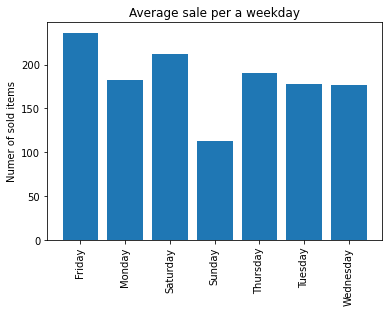

In [28]:
fig, ax = plt.subplots()
ax.bar(av_sale_weekday['weekdaydt'], av_sale_weekday['bikes'])
plt.title("Average sale per a weekday")
plt.xticks(rotation=90)
ax.set_ylabel("Numer of sold items")
plt.show()

In [29]:
Sale_season = df.groupby('Season').mean().reset_index()
Sale_season

,Season,Unnamed: 0,bikes,quarter
0,Autumn,299.000000,149.617978,3.898876
1,Spring,119.500000,222.279070,1.860465
2,Summer,208.500000,210.282609,2.880435
3,Winter,64.518072,152.469880,1.253012


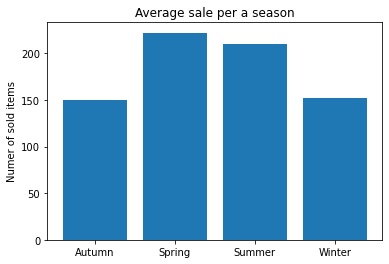

In [30]:
fig, ax = plt.subplots()
ax.bar(Sale_season['Season'], Sale_season['bikes'])
ax.set_ylabel("Numer of sold items")
plt.title("Average sale per a season")
plt.show()

In [31]:
Sale_month = df.groupby('month').mean().reset_index()
Sale_month

,month,Unnamed: 0,bikes,quarter
0,01 - January,15.0,144.586207,1.0
1,02 - February,43.5,156.250000,1.0
2,03 - March,73.0,170.451613,1.0
3,04 - April,102.5,208.214286,2.0
4,05 - May,131.0,248.517241,2.0
5,06 - June,159.5,230.607143,2.0
6,07 - July,189.0,258.516129,3.0
7,08 - August,219.0,210.206897,3.0
8,09 - September,248.5,129.300000,3.0
9,10 - October,278.5,161.533333,4.0


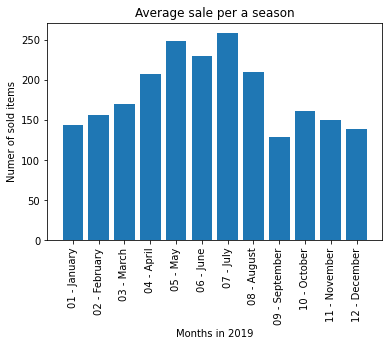

In [32]:
fig, ax = plt.subplots()
ax.bar(Sale_month['month'], Sale_month['bikes'])
ax.set_ylabel("Numer of sold items")
ax.set_xlabel("Months in 2019")
plt.xticks(rotation=90)
plt.title("Average sale per a season")
plt.show()

#### End of Summer is clear. Average number of sold bikes is less for Sept then for August. Also seasonality is visible.

## Bikes' sales histogram

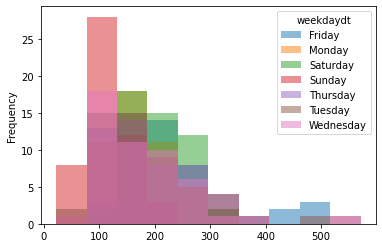

In [33]:
df1 = df.pivot(columns="weekdaydt", values="bikes").plot.hist(bins=10, alpha = 0.5)

plt.show()

##### View not clear enough, I'm trying on

C:\Users\anton\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 19'. Pick better value with 'binwidth'.


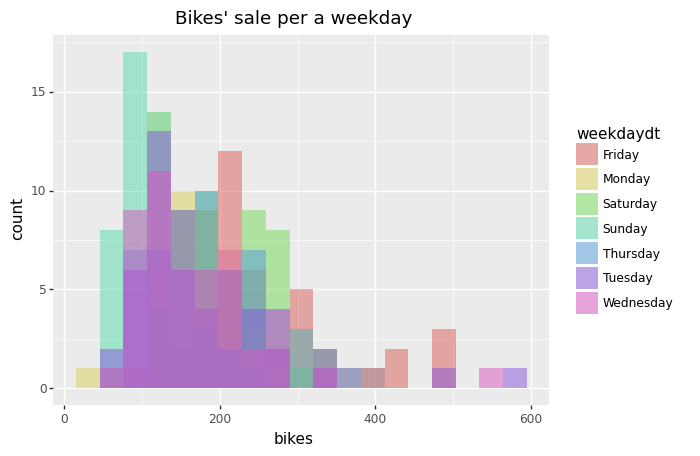

<ggplot: (-9223371924478991409)>

In [34]:
ggplot(data = df) +\
geom_histogram(aes(x='bikes', fill = 'weekdaydt'), position = 'identity', alpha = 0.5) +\
ggtitle("Bikes' sale per a weekday")

##### Still inconclusive

In [35]:
print(df['weekdaydt'].unique())

['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday']


In [36]:
df_Wed = df[df.weekdaydt == 'Wednesday']
df_Mon = df[df.weekdaydt == 'Monday']
df_Tue = df[df.weekdaydt == 'Tuesday']
df_Thursday = df[df.weekdaydt == 'Thursday']
df_Friday = df[df.weekdaydt == 'Friday']
df_Saturday = df[df.weekdaydt == 'Saturday']
df_Sunday = df[df.weekdaydt == 'Sunday']

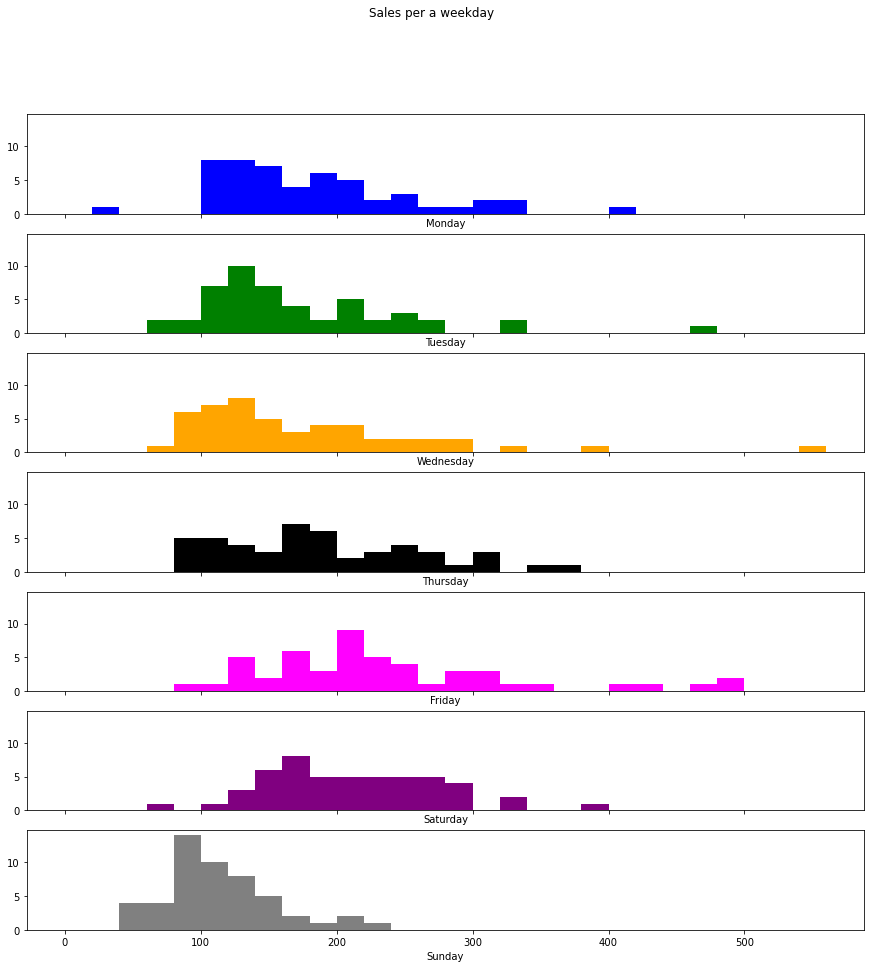

<function matplotlib.pyplot.hist>

In [37]:
#to make sure that we see what we see let's do a multiplot!
step=20 #binwidth
fig, ax = plt.subplots(7,1, sharey=True, sharex = True, figsize=(15,15))
ax[0].hist(df_Mon['bikes'], color = "b", bins = range(0, max(df['bikes']), step))
ax[1].hist(df_Tue['bikes'], color = 'g', bins = range(0, max(df['bikes']), step))
ax[2].hist(df_Wed['bikes'], color = "orange", bins = range(0, max(df['bikes']), step))
ax[3].hist(df_Thursday['bikes'],color = "black", bins = range(0, max(df['bikes']), step))
ax[4].hist(df_Friday['bikes'], color = "magenta", bins = range(0, max(df['bikes']), step))
ax[5].hist(df_Saturday['bikes'],color = "purple", bins = range(0, max(df['bikes']), step))
ax[6].hist(df_Sunday['bikes'], color = 'grey', bins = range(0, max(df['bikes']), step))
ax[0].set_xlabel("Monday")
ax[1].set_xlabel("Tuesday")
ax[2].set_xlabel("Wednesday")
ax[3].set_xlabel("Thursday")
ax[4].set_xlabel("Friday")
ax[5].set_xlabel("Saturday")
ax[6].set_xlabel("Sunday")
plt.suptitle('Sales per a weekday')
plt.show()
plt.hist

## Histograms interpretation:
1. Sunday looks different - bigger number of smaller transactions. Sunday also has no long right tail: Sunday's distrib has less dispersion.
2. Distributions per day are different than each other. 
3. Friday tends to be bi-/multimomial in comparison to Sunday or Saturday
4. There are observations in tails. This is worth to investigate these outliers when building any regression based models. 

In [38]:
df.groupby("weekdaydt").count().iloc[:,2:3] #check for numbers of representation

,bikes
weekdaydt,
Friday,50
Monday,51
Saturday,51
Sunday,51
Thursday,48
Tuesday,50
Wednesday,49


## Time-Series plot

In [39]:
ts_df = df
ts_df.head()

,Unnamed: 0,date,bikes,datedt,weekdaydt,month,Season,quarter
0,1,02.01.2019,123,2019-01-02,Wednesday,01 - January,Winter,1
1,2,03.01.2019,195,2019-01-03,Thursday,01 - January,Winter,1
2,3,04.01.2019,202,2019-01-04,Friday,01 - January,Winter,1
3,4,05.01.2019,75,2019-01-05,Saturday,01 - January,Winter,1
4,5,07.01.2019,178,2019-01-07,Monday,01 - January,Winter,1


In [40]:
ts_df.set_index('datedt', inplace = True)
ts_df.head()

,Unnamed: 0,date,bikes,weekdaydt,month,Season,quarter
datedt,,,,,,,
2019-01-02,1,02.01.2019,123,Wednesday,01 - January,Winter,1
2019-01-03,2,03.01.2019,195,Thursday,01 - January,Winter,1
2019-01-04,3,04.01.2019,202,Friday,01 - January,Winter,1
2019-01-05,4,05.01.2019,75,Saturday,01 - January,Winter,1
2019-01-07,5,07.01.2019,178,Monday,01 - January,Winter,1


In [41]:
#setting the frequency
ts_df = ts_df.asfreq('d')

In [42]:
ts_df.isna().sum() #14 missing daily observations

Unnamed: 0    14
date          14
bikes         14
weekdaydt     14
month         14
Season        14
quarter       14
dtype: int64

#### As I'm not sure what is your approach to handling with missing values - I assure you I would ask :) For now I decide to use fillna() Front Filling method

List of ideas:
    1. Front filling | and this is what I'm doing
    2. Back filling
    3. Filing with neighbours average
    4. Filling with the same value that is the average of all values 
    5. Fill with zero as no bikes were sold that day
    6. Not filling in (leave blank)



In [43]:
ts_df['bikes'] = ts_df['bikes'].fillna(method ='ffill')

In [44]:
ts_df.head()

,Unnamed: 0,date,bikes,weekdaydt,month,Season,quarter
datedt,,,,,,,
2019-01-02,1.0,02.01.2019,123.0,Wednesday,01 - January,Winter,1.0
2019-01-03,2.0,03.01.2019,195.0,Thursday,01 - January,Winter,1.0
2019-01-04,3.0,04.01.2019,202.0,Friday,01 - January,Winter,1.0
2019-01-05,4.0,05.01.2019,75.0,Saturday,01 - January,Winter,1.0
2019-01-06,NaN,NaN,75.0,NaN,NaN,NaN,NaN


In [45]:
ts_df.info

<bound method DataFrame.info of             Unnamed: 0        date  bikes  weekdaydt          month  Season  \
datedt                                                                        
2019-01-02         1.0  02.01.2019  123.0  Wednesday   01 - January  Winter   
2019-01-03         2.0  03.01.2019  195.0   Thursday   01 - January  Winter   
2019-01-04         3.0  04.01.2019  202.0     Friday   01 - January  Winter   
2019-01-05         4.0  05.01.2019   75.0   Saturday   01 - January  Winter   
2019-01-06         NaN         NaN   75.0        NaN            NaN     NaN   
...                ...         ...    ...        ...            ...     ...   
2019-12-27       346.0  27.12.2019   83.0     Friday  12 - December  Winter   
2019-12-28       347.0  28.12.2019  217.0   Saturday  12 - December  Winter   
2019-12-29       348.0  29.12.2019   82.0     Sunday  12 - December  Winter   
2019-12-30       349.0  30.12.2019  200.0     Monday  12 - December  Winter   
2019-12-31       350

In [46]:
#helping dataframe to visualisation purposes
top5 = ts_df.reset_index()
top5 = top5.sort_values(by = ["bikes"], ascending = False).head(n=5)
top5.set_index('datedt', inplace = True)
top5

,Unnamed: 0,date,bikes,weekdaydt,month,Season,quarter
datedt,,,,,,,
2019-07-30,203.0,30.07.2019,571.0,Tuesday,07 - July,Summer,3.0
2019-07-31,204.0,31.07.2019,548.0,Wednesday,07 - July,Summer,3.0
2019-05-17,131.0,17.05.2019,490.0,Friday,05 - May,Spring,2.0
2019-07-26,199.0,26.07.2019,480.0,Friday,07 - July,Summer,3.0
2019-07-19,192.0,19.07.2019,478.0,Friday,07 - July,Summer,3.0


#### Time Series plot with top 5 

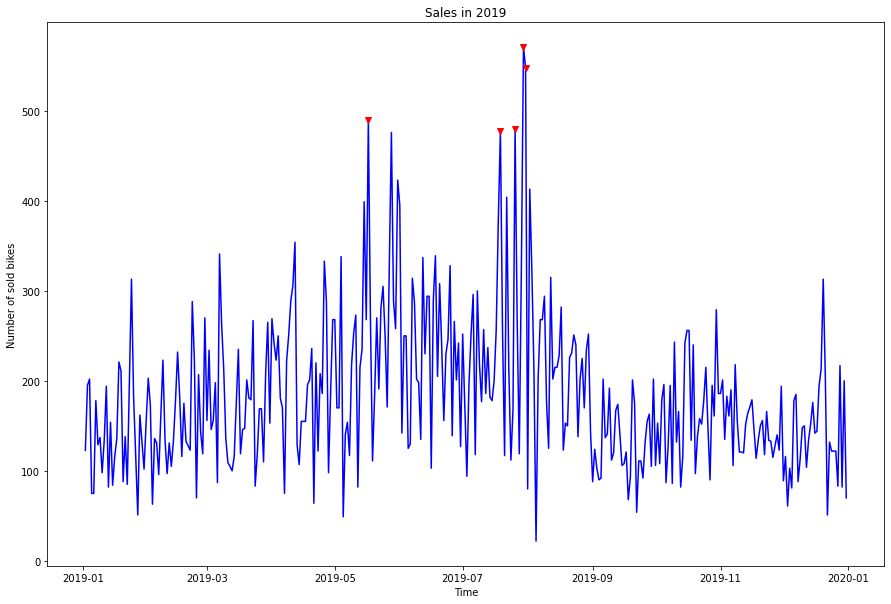

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(ts_df.index, ts_df['bikes'], color = 'b')
ax.plot(top5.index, top5["bikes"], marker = "v", color = "r", linestyle = "")
ax.set_xlabel("Time")
ax.set_ylabel("Number of sold bikes")
plt.title("Sales in 2019")
plt.show()

## Other variables that might be helpful with bikes sales forecasting
1. Weather data, especially percipitation - this is daily data, so the data structure is the same as the sales data
2. Geographic data (city/country, tourist resort)
3. Sales type: retail/wholesale. This pick in May 2019 could have been a veturilo?

I think these above are easy to be joined and can be helpful in making subgroups.